<a href="https://www.kaggle.com/code/mariambadrmb/fashion-mnist-clasification?scriptVersionId=253542548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Conv2D , MaxPooling2D , Dropout, BatchNormalization
from tensorflow.keras.utils import  to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import os

2025-07-31 18:02:37.433756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753984957.636440      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753984957.697589      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
valid = 0.001 * X_train.shape[0]
X_validation = X_train[:int(valid)]
y_validation = y_train[:int(valid)]
X_train = X_train[int(valid):]
y_train = y_train[int(valid):]

In [4]:
X_train.shape

(59940, 28, 28)

In [5]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


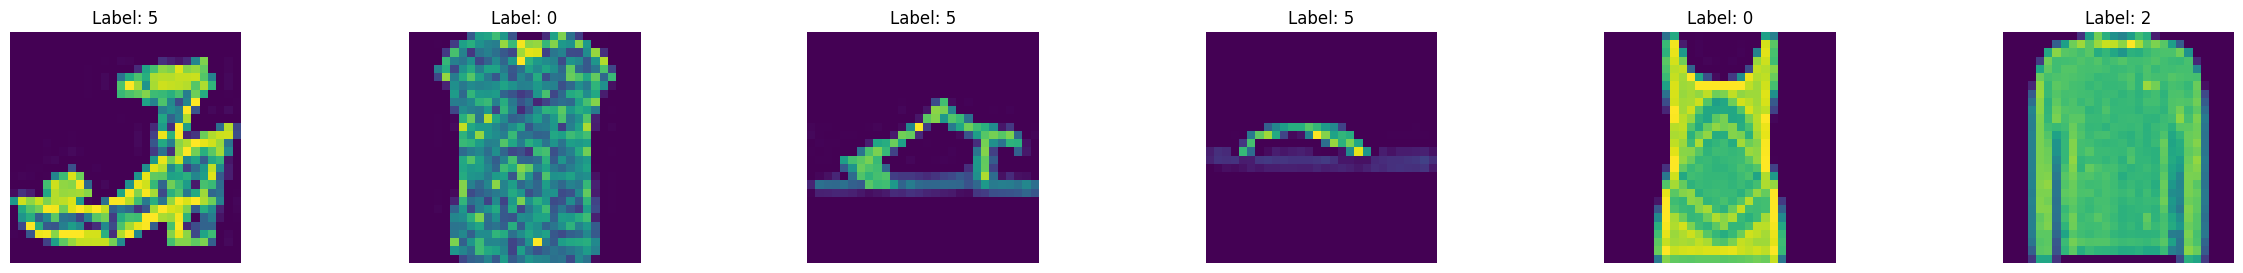

In [6]:
plt.figure(figsize=(30, 3))

for index, (image, label) in enumerate(zip(X_train[0:6], y_train[0:6])):
    plt.subplot(1, 6, index + 1)
    image = image.reshape(28, 28,1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [7]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_validation = np.array(X_validation) / 255.0

X_train = X_train.reshape(-1, 28, 28 , 1)
X_test = X_test.reshape(-1, 28, 28 , 1)
X_validation = X_validation.reshape(-1, 28, 28, 1)

In [8]:
model = Sequential([
    Conv2D(32 , (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-31 18:02:57.185849: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

history_CNN  = model.fit(
    X_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop_cb]
)

Epoch 1/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.7618 - loss: 0.6979 - val_accuracy: 0.9167 - val_loss: 0.2663
Epoch 2/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8678 - loss: 0.3651 - val_accuracy: 0.8500 - val_loss: 0.2674
Epoch 3/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8859 - loss: 0.3102 - val_accuracy: 0.9333 - val_loss: 0.2049
Epoch 4/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8990 - loss: 0.2802 - val_accuracy: 0.8500 - val_loss: 0.2676
Epoch 5/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9035 - loss: 0.2569 - val_accuracy: 0.9333 - val_loss: 0.1438
Epoch 6/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9138 - loss: 0.2320 - val_accuracy: 0.9333 - val_loss: 0.1467
Epoch 7/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9203 - loss: 0.2175 - val_accuracy: 0.9167 - val_loss: 0.2011
Epoch 8/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9238 - loss: 0.2007 - 

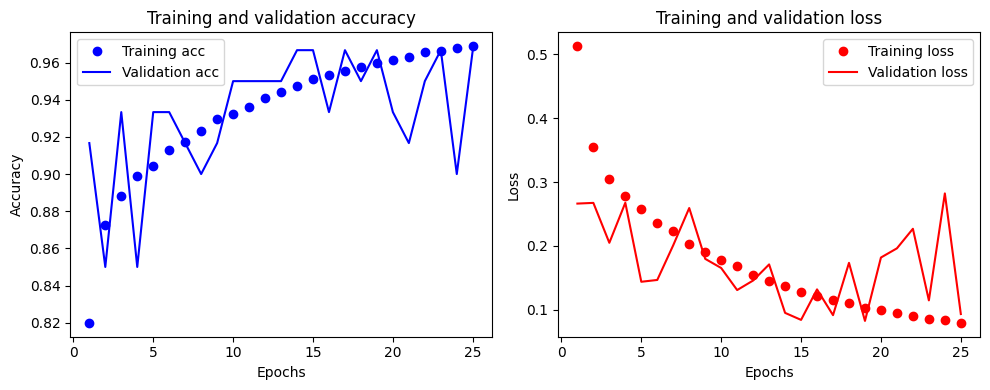

In [11]:
acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']


epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [13]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8980 - loss: 0.4453
